### **UNDERSTANDING THE DATA & PREPARATION OF DATA
In this part I will continue to explore data. I will be interested in calendar data and the property type specification of the listings.

In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#exporting the data
calendar_df = pd.read_csv('./calendar.csv')
listings_df = pd.read_csv('./listings.csv')

I will create a new dataframe from the calendar and try to find availability of listings.
'Available' value is either 't' or 'f'. It can not be null.
'Price' value exists only for available days. Therefore this column can be used to find total available days of a listings.

In [3]:
#a new data frame is created to see how busy each listing
listing_availability = calendar_df.groupby('listing_id').count()
#two new columns are added: busy_days shows the total busy days of a listing and availabilty show the rate that a listing is available
listing_availability['busy_days'] = listing_availability['available']-listing_availability['price']
listing_availability['Availability'] = listing_availability['price']/listing_availability['available']
#needless or repeated columns can be removed
listing_availability.drop(['date', 'available', 'price'], axis=1, inplace=True)
listing_availability.head()

,busy_days,Availability
listing_id,,
3335,56,0.846575
4291,0,1.000000
5682,56,0.846575
6606,0,1.000000
7369,312,0.145205


We has found the availability of each listing.
We will be interested in property types. We added this column to our created dataframe.

In [4]:
#property type column is added to our new dataframe
listing_availability = listing_availability.join(listings_df.set_index('id')['property_type']).reset_index()
listing_availability.head()

,listing_id,busy_days,Availability,property_type
0,3335,56,0.846575,NaN
1,4291,0,1.000000,House
2,5682,56,0.846575,Apartment
3,6606,0,1.000000,Apartment
4,7369,312,0.145205,Condominium


Now, everything is ready to compare property types.
We will generate another data frame that show some qualifications for all property types.
We will count the number of each property type, and total busy days for it.
After that, we can easily calculate the rates for each like what percentage of listings is a house in Seattle.

In [5]:
#a new dataframe is created to analyze different property types' fullness
property_type_groups = pd.concat([listing_availability.groupby('property_type').count()['Availability'],listing_availability.groupby('property_type')['Availability'].mean(), listing_availability.groupby('property_type')['busy_days'].sum()], axis=1).reset_index()
#renaming columns
property_type_groups.columns.values[[1, 2]] = ['total_count', 'aggreagreate_availability']
#two columns are added to see what percentage a property type among all and how much it is preferred by customers
property_type_groups['busy_day_rate'] = property_type_groups['busy_days'] / property_type_groups['busy_days'].sum()
property_type_groups['property_type_rate'] = property_type_groups['total_count'] / property_type_groups['total_count'].sum()
#sorting dataframe and reset index
property_type_groups.sort_values(by='total_count', ascending=False, inplace=True)
property_type_groups.reset_index(inplace=True)
property_type_groups.head()


,index,property_type,total_count,aggreagreate_availability,busy_days,busy_day_rate,property_type_rate
0,9,House,1733,0.690292,195904,0.426832,0.454021
1,0,Apartment,1708,0.653818,215817,0.470218,0.447472
2,13,Townhouse,118,0.630485,15915,0.034675,0.030914
3,7,Condominium,91,0.578835,13989,0.030479,0.023841
4,10,Loft,40,0.677466,4709,0.010260,0.010479


The table looks good but I prefer a plot.

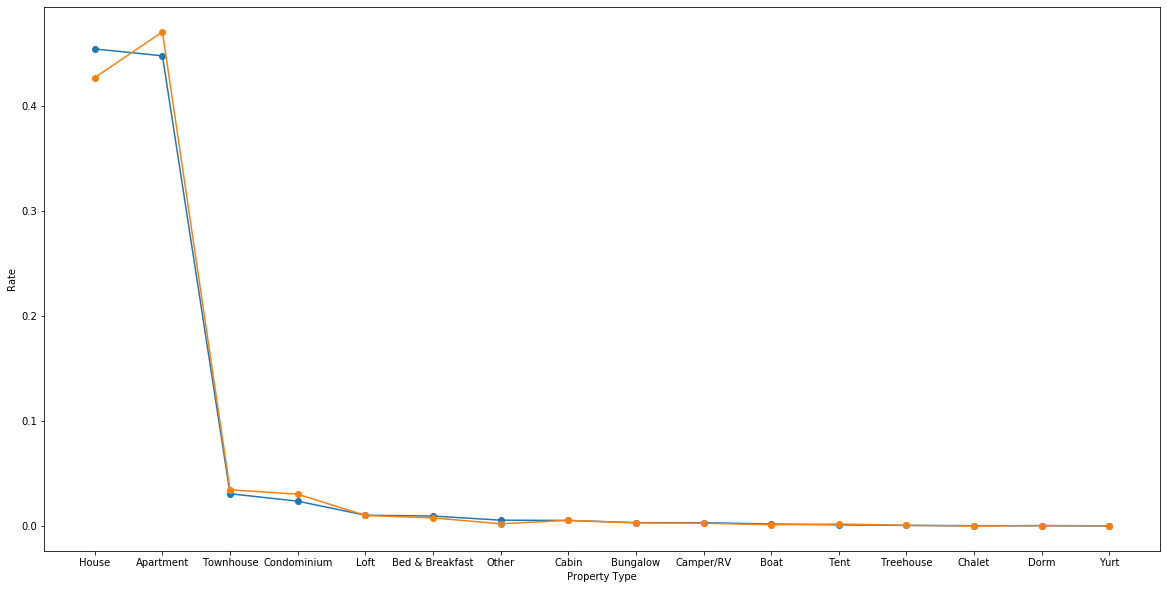

In [6]:
# create figure and axis objects with subplots()
fig,ax=plt.subplots()
ax.plot(property_type_groups['property_type'], property_type_groups['property_type_rate'], marker="o")
ax.set_xlabel("Property Type")
ax.set_ylabel("Rate")
ax.plot(property_type_groups['property_type'], property_type_groups['busy_day_rate'], marker="o")
plt.gcf().set_size_inches(20, 10)
plt.show()

After the top few items, all the values are so close, so I did not like this graph.
I prefer to see demand-supply gap for property types clearly.

In [7]:
property_type_groups['diff_btw_demandsupply'] = property_type_groups['busy_day_rate'] - property_type_groups['property_type_rate']
property_type_groups[{'property_type', 'busy_day_rate', 'property_type_rate', 'diff_btw_demandsupply'}].style.bar(subset=['diff_btw_demandsupply'], align='mid', color=['#d65f5f', '#5fba7d'])



,busy_day_rate,diff_btw_demandsupply,property_type,property_type_rate
0,0.426832,-0.027189,House,0.454021
1,0.470218,0.022746,Apartment,0.447472
2,0.034675,0.003761,Townhouse,0.030914
3,0.030479,0.006638,Condominium,0.023841
4,0.010260,-0.000220,Loft,0.010479
5,0.007937,-0.001756,Bed & Breakfast,0.009693
6,0.002349,-0.003415,Other,0.005764
7,0.005628,0.000126,Cabin,0.005502
8,0.003133,-0.000273,Bungalow,0.003406
9,0.002880,-0.000525,Camper/RV,0.003406


This table is more easy to interpret.
Actually, most of the listings consist of a few property type.
Apartments are most liked ones. Even only they contributes about 44 percent of all, 47 of people choose to stay in apartments. 
On the other hand houses has biggest negative gap between supply and demand.
Therefore it may be better not to invest in House for the next investor in Seattle.

However, this information can only explain the property type distribution.
Understanding the logic behind preferences is more important. For instance, if the houses are the only 20 percent of all properties in Seattle and house rent prices in Airbnb are twice of others, we can see that houses is still attractive.
For this reason, we need to move deeper.